In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def classifyClass(feature,target):
    class1=[]
    class2=[]
    for i in range(len(target)):
        if target[i]==1:
            class1.append(feature[i])
        else:
            class2.append(feature[i])
    return class1,class2

def data_process():
    with open("/user_data/PR/HW3/dataset.txt","r") as f:
        data = f.read().split('\n')
        data.pop(-1) # 刪除list最後一項空白
        feature = []
        target = []
        for i in data:
            
            i = i.split(",")    
            float_i = []
            for item in i[0:-1]: #資料沒做好 切除最後一項空白
                float_item = float(item)
                float_i.append(float_item)
            feature.append(float_i[1:])
            target.append(int(i[0]))

        feature = np.array(feature)
        target = np.array(target)
        # print(data)
        class1,class2=classifyClass(feature,target)
        return class1,class2

0 0.01499366755052134
0.01 0.01490252382830186
0.02 0.0148137587849956
0.03 0.014727336448082537
0.04 0.014643221920337741
0.05 0.014561381356412065
0.060000000000000005 0.014481781940194165
0.07 0.014404391862932558
0.08 0.014329180302097464
0.09 0.014256117400962692
0.09999999999999999 0.014185174248888741
0.10999999999999999 0.014116322862288897
0.11999999999999998 0.014049536166260819
0.12999999999999998 0.01398478797686677
0.13999999999999999 0.013922052984046208
0.15 0.013861306735145247
0.16 0.013802525619047932
0.17 0.013745686850894934
0.18000000000000002 0.01369076845737585
0.19000000000000003 0.013637749262581796
0.20000000000000004 0.013586608874405607
0.21000000000000005 0.013537327671477316
0.22000000000000006 0.013489886790623374
0.23000000000000007 0.013444268114838162
0.24000000000000007 0.013400454261757323
0.25000000000000006 0.013358428572622401
0.26000000000000006 0.01331817510172717
0.2700000000000001 0.013279678606336217
0.2800000000000001 0.013242924537066816
0.

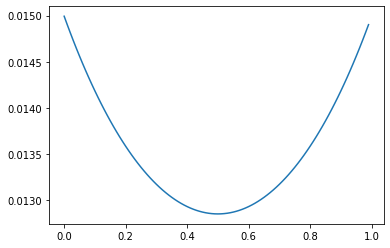

In [20]:
classA,classB=data_process()
turn = 0
upper_bound=9999
s= -1
x_axis = []
y_axis = []
while turn<=1:
    mean_distance = (np.transpose(np.mean(classB,axis=0)-np.mean(classA,axis=0)).dot(np.linalg.inv((np.cov(np.transpose(classA))+np.cov(np.transpose(classB)))/2)).dot(np.mean(classB,axis = 0)-np.mean(classA)))*( turn*(1-turn)/2 ) 
    cov_distance = np.log( np.linalg.det((np.cov(np.transpose(classA))+np.cov(np.transpose(classB)))/2) / np.sqrt(np.linalg.det(np.cov(np.transpose(classA))) * np.linalg.det(np.cov(np.transpose(classB)))) ) /2
    
    total_dis = mean_distance + cov_distance
    p_a = len(classA)/(len(classA)+len(classB))
    p_b = len(classB)/(len(classA)+len(classB))
    bound = np.sqrt(p_a * p_b) * math.exp(-total_dis)
    x_axis.append(turn)
    y_axis.append(bound)
    print(turn,bound)
    if bound<upper_bound:
        upper_bound=bound
        s=turn
    turn+=0.01
print(f'upper bound at: {s}, value: {upper_bound}')
plt.plot(x_axis,y_axis)
plt.show() 

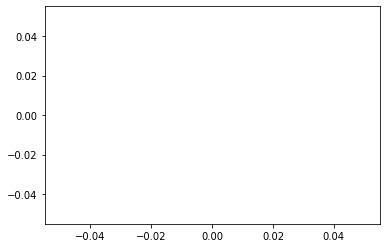

In [16]:
plt.plot(xpt,ypt)
plt.show() 